In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
beta = "rate of infection"
gamma = "rate of recovery"
S = "fraction susceptible"
I = "fraction infected"
R = "fraction recovered"

('rate of infection', 'rate of recovery')

In [ ]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    rate_of_suseptible = -beta * S * I
    rate_of_infected = beta * S * I - gamma * I
    rate_of_recovering = gamma * I
    return [rate_of_suseptible, rate_of_infected, rate_of_recovering]

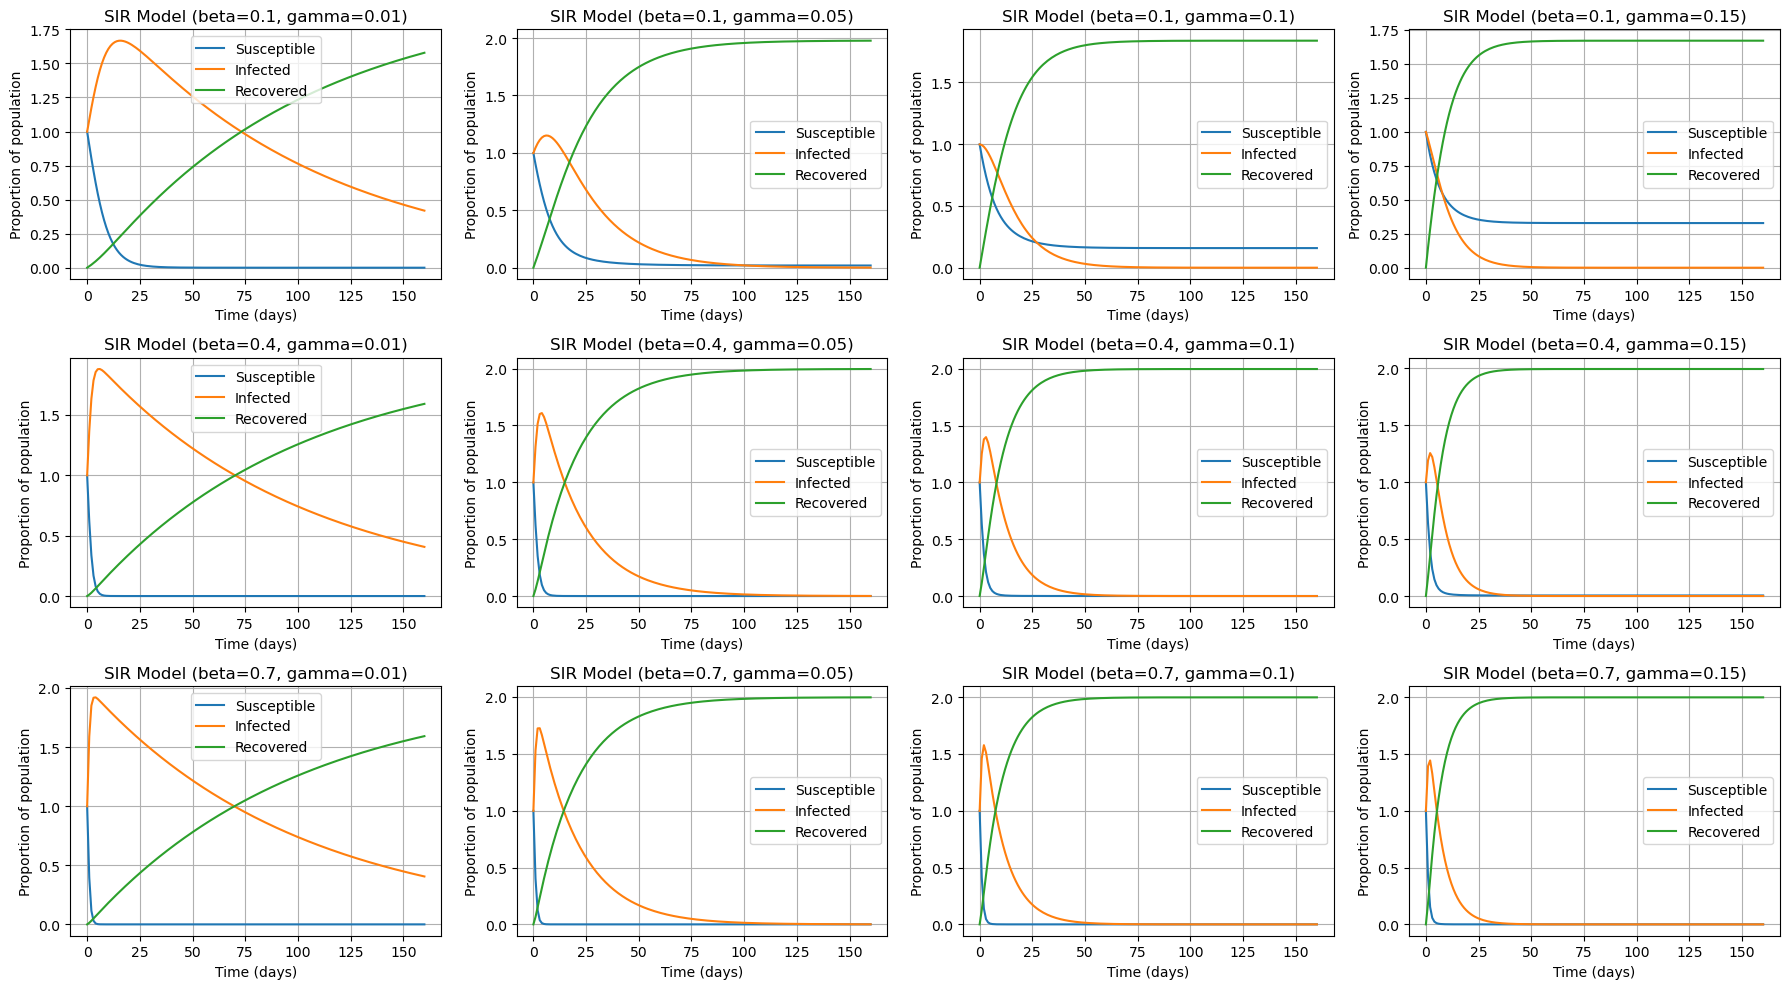

In [33]:
# Setup initial conditions
init_pop_infected: float = 0.0013
init_pop_total: float = 1 - init_pop_infected
init_pop_recoverd: float = 0.0
y0 = [init_pop_total, init_pop_total, init_pop_recoverd]

beta_values = [0.1, 0.4, 0.7] # Rate of infection
gamma_values = [0.01, 0.05, 0.1, 0.15]  # Rate of recovery

t = np.linspace(0, 160, 160)

fig, axs = plt.subplots(len(beta_values), len(gamma_values), figsize=(18, 10))
axs = axs.ravel()
i = 0

for beta in beta_values:
    for gamma in gamma_values:
        solution = odeint(sir_model, y0, t, args=(beta, gamma))
        S, I, R = solution.T

        axs[i].plot(t, S, label="Susceptible")
        axs[i].plot(t, I, label="Infected")
        axs[i].plot(t, R, label="Recovered")
        axs[i].set_xlabel("Time (days)")
        axs[i].set_ylabel("Proportion of population")
        axs[i].set_title(f"SIR Model (beta={beta}, gamma={gamma})")
        axs[i].legend()
        axs[i].grid(True)

        i+=1

plt.tight_layout()
plt.show()